In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# Read dataset

In [18]:
df1 = pd.read_csv("Expense Data 1.csv")

In [19]:
df2 = pd.read_csv("Expense Amount Data 1.csv")

In [20]:
df1

,Expense Code,Month,Expense Quantity,Government Entity
0,10003,42948,1530,Ministry of Education
1,10003,42979,3060,Ministry of Education
2,10007,42917,1792,Ministry of Health
3,10007,42979,2048,Ministry of Health
4,10007,43132,1024,Ministry of Health
...,...,...,...,...
17080,9990,42856,2700,Ministry of Health
17081,9990,43160,100,Ministry of Health
17082,9996,42826,7800,Ministry of Energy
17083,9996,43009,5200,Ministry of Energy


In [21]:
df2

,Expense Code,Expense Amount (SAR)
0,10532,4.46
1,10640,6.84
2,11053,0.36
3,11291,2.47
4,11436,1.70
...,...,...
3782,9827,10.45
3783,9838,4.41
3784,9859,5.12
3785,9920,0.42


# Merged Method

In [22]:
merged=df1.merge(df2, on=['Expense Code'])

In [23]:
merged.head()

,Expense Code,Month,Expense Quantity,Government Entity,Expense Amount (SAR)
0,10003,42948,1530,Ministry of Education,4.48
1,10003,42979,3060,Ministry of Education,4.48
2,10007,42917,1792,Ministry of Health,8.82
3,10007,42979,2048,Ministry of Health,8.82
4,10007,43132,1024,Ministry of Health,8.82


In [24]:
merged.shape

(17085, 5)

# Information about dataset

In [25]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17085 entries, 0 to 17084
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Expense Code          17085 non-null  int64  
 1   Month                 17085 non-null  object 
 2   Expense Quantity      17083 non-null  object 
 3   Government Entity     17085 non-null  object 
 4   Expense Amount (SAR)  17085 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 800.9+ KB


# Data Cleaning

In [26]:
merged.isna().sum()

Expense Code            0
Month                   0
Expense Quantity        2
Government Entity       0
Expense Amount (SAR)    0
dtype: int64

In [27]:
merged = merged.fillna(value = 0)

In [28]:
merged.isna().sum()

Expense Code            0
Month                   0
Expense Quantity        0
Government Entity       0
Expense Amount (SAR)    0
dtype: int64

In [29]:
merged.duplicated().sum()

0

# Data Preprocessing

In [30]:
# Convert the string to an integer
merged['Expense Quantity'] = pd.to_numeric(merged['Expense Quantity'], errors='coerce').fillna(0, downcast='infer')

In [31]:
# Convert the Month
merged['Date']=pd.to_datetime(pd.to_numeric(merged['Month'],errors='coerce'),errors='coerce',origin='1899-12-30',unit='D')

merged['Date']

0       2017-08-01
1       2017-09-01
2       2017-07-01
3       2017-09-01
4       2018-02-01
           ...    
17080   2017-05-01
17081   2018-03-01
17082   2017-04-01
17083   2017-10-01
17084   2018-04-01
Name: Date, Length: 17085, dtype: datetime64[ns]

In [32]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17085 entries, 0 to 17084
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Expense Code          17085 non-null  int64         
 1   Month                 17085 non-null  object        
 2   Expense Quantity      17085 non-null  int64         
 3   Government Entity     17085 non-null  object        
 4   Expense Amount (SAR)  17085 non-null  float64       
 5   Date                  17083 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 934.3+ KB


In [33]:
merged.drop('Month',axis = 1 , inplace = True)

In [34]:
merged.isna().sum()

Expense Code            0
Expense Quantity        0
Government Entity       0
Expense Amount (SAR)    0
Date                    2
dtype: int64

In [35]:
merged = merged.fillna(method = 'pad')

In [36]:
merged.isna().sum()

Expense Code            0
Expense Quantity        0
Government Entity       0
Expense Amount (SAR)    0
Date                    0
dtype: int64

In [37]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17085 entries, 0 to 17084
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Expense Code          17085 non-null  int64         
 1   Expense Quantity      17085 non-null  int64         
 2   Government Entity     17085 non-null  object        
 3   Expense Amount (SAR)  17085 non-null  float64       
 4   Date                  17085 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 800.9+ KB


In [38]:
merged.duplicated().sum()

0

In [39]:
merged.head()

,Expense Code,Expense Quantity,Government Entity,Expense Amount (SAR),Date
0,10003,1530,Ministry of Education,4.48,2017-08-01
1,10003,3060,Ministry of Education,4.48,2017-09-01
2,10007,1792,Ministry of Health,8.82,2017-07-01
3,10007,2048,Ministry of Health,8.82,2017-09-01
4,10007,1024,Ministry of Health,8.82,2018-02-01


# Index Month

In [40]:
merged.set_index('Date',inplace= True)
merged.head()

,Expense Code,Expense Quantity,Government Entity,Expense Amount (SAR)
Date,,,,
2017-08-01,10003,1530,Ministry of Education,4.48
2017-09-01,10003,3060,Ministry of Education,4.48
2017-07-01,10007,1792,Ministry of Health,8.82
2017-09-01,10007,2048,Ministry of Health,8.82
2018-02-01,10007,1024,Ministry of Health,8.82


In [41]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17085 entries, 2017-08-01 to 2018-04-01
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Expense Code          17085 non-null  int64  
 1   Expense Quantity      17085 non-null  int64  
 2   Government Entity     17085 non-null  object 
 3   Expense Amount (SAR)  17085 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 667.4+ KB


In [42]:
merged.drop('Expense Code',axis = 1 , inplace = True)

In [43]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17085 entries, 2017-08-01 to 2018-04-01
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Expense Quantity      17085 non-null  int64  
 1   Government Entity     17085 non-null  object 
 2   Expense Amount (SAR)  17085 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 533.9+ KB


In [44]:
merged.head()

,Expense Quantity,Government Entity,Expense Amount (SAR)
Date,,,
2017-08-01,1530,Ministry of Education,4.48
2017-09-01,3060,Ministry of Education,4.48
2017-07-01,1792,Ministry of Health,8.82
2017-09-01,2048,Ministry of Health,8.82
2018-02-01,1024,Ministry of Health,8.82


# Exploratory Data Analysis (EDA)

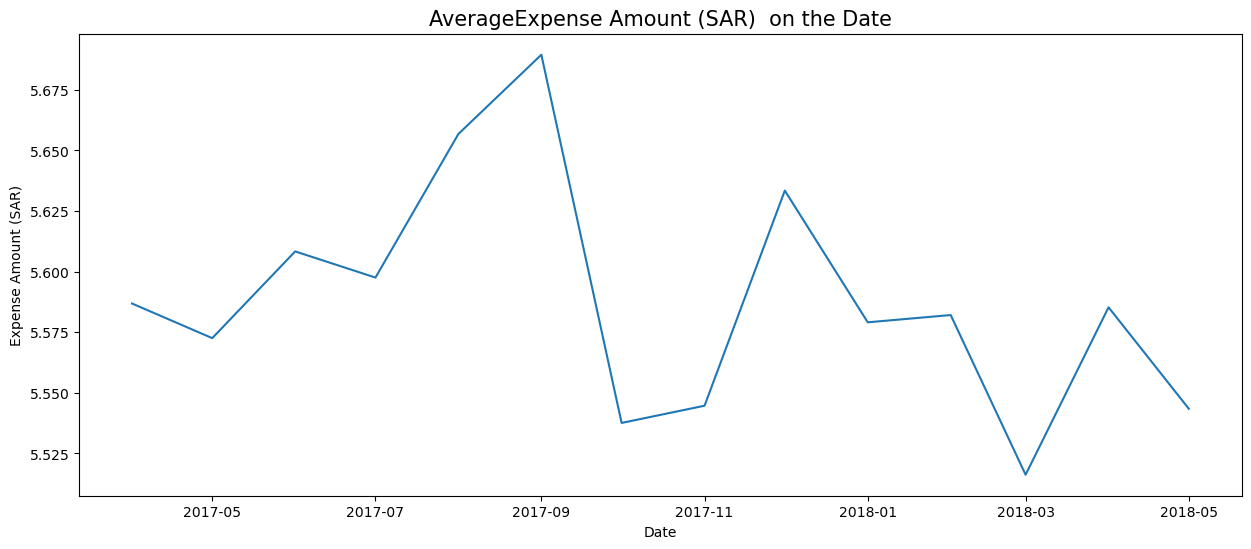

In [46]:
merged_temp = merged.groupby(['Date'])['Expense Amount (SAR)'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.lineplot(x="Date", y="Expense Amount (SAR)", data=merged_temp).set_title("AverageExpense Amount (SAR)  on the Date",fontsize=15)

In [47]:
merged.index

DatetimeIndex(['2017-08-01', '2017-09-01', '2017-07-01', '2017-09-01',
               '2018-02-01', '2017-06-01', '2017-06-01', '2017-10-01',
               '2018-03-01', '2017-04-01',
               ...
               '2018-03-01', '2018-05-01', '2017-05-01', '2017-06-01',
               '2017-12-01', '2017-05-01', '2018-03-01', '2017-04-01',
               '2017-10-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Date', length=17085, freq=None)

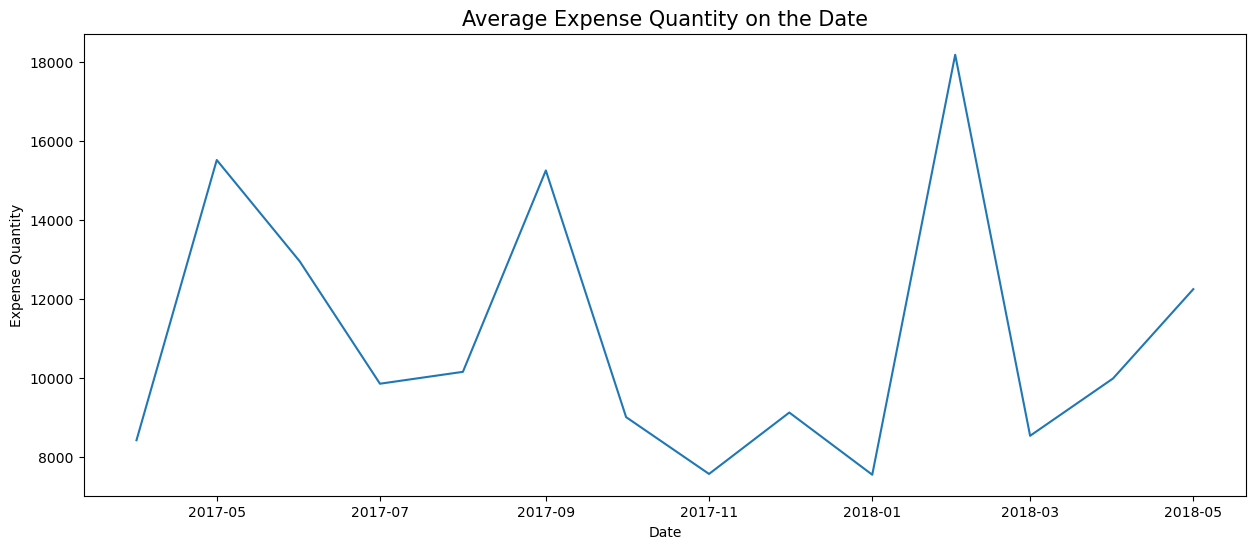

In [48]:
merged_temp = merged.groupby(['Date'])['Expense Quantity'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.lineplot(x="Date", y="Expense Quantity", data=merged_temp).set_title("Average Expense Quantity on the Date",fontsize=15)

In [49]:
merged['2017':'2017']

,Expense Quantity,Government Entity,Expense Amount (SAR)
Date,,,
2017-08-01,1530,Ministry of Education,4.48
2017-09-01,3060,Ministry of Education,4.48
2017-07-01,1792,Ministry of Health,8.82
2017-09-01,2048,Ministry of Health,8.82
2017-06-01,8,Ministry of Health,4.05
...,...,...,...
2017-06-01,1920,Ministry of Energy,9.87
2017-12-01,1152,Ministry of Energy,9.87
2017-05-01,2700,Ministry of Health,3.63
